# Etivity 1
## Name: Martin Power
## ID      : 9939245


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

%matplotlib inline

Suggestion: try PLA on this dataset before using the bank dataset

In [2]:
#X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
X, y = make_blobs(n_samples=80, centers=2, n_features=2)
#X, y = make_moons(n_samples=1000, noise=0.15)
y = [yy if yy == 1 else -1 for yy in y] 

In [3]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [4]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [5]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # MPP return [pointOnBoundary(x_min), pointOnBoundary(x_max)] < -- Code typo
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [6]:
def pla(training_in, training_out, weights, max_iterations=1000, pocket=False,  verbose=1):
    bias = np.array([1])
    iterations=0
    min_error=1.0
    max_error=0.0
    error_log=np.empty((0))
      
    while True:
        errors = 0;
        iterations+=1;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)[0]!=y):
                #MPP iterations+=1; <-- code typo
                # MPP weights = weights + y*(np.concatenate((bias,x))) <-- code typo
                weights = (weights.T + y*(np.concatenate((bias,x)))).T
                errors+=1;
        
        error_rate = calc_error(training_in, training_out, weights)
                
        if(error_rate<min_error):
            min_error = error_rate
            if(pocket==True):
                pocket_weights = weights
            
        if(error_rate>max_error):
            max_error = error_rate
        
        if(pocket==True):
            error_log = np.append(error_log, min_error)
        else:
            error_log = np.append(error_log, error_rate)          
     
        if (errors == 0):
            break
            
        # If results are not converging after maximum iterations are reached, exit
        if (iterations==max_iterations):
            break
            
    if(pocket==True):
        weights=pocket_weights
        
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    if(pocket==True):
        plt.title("Error Rate Progression Across Iterations using Pocket Learning Algorithm")
    else:
        plt.title("Error Rate Progression Across Iterations using Perceptron Learning Algorithm")
    plt.xlabel("Iteration")
    plt.ylabel("Error Rate")
    plt.plot(error_log, linestyle='dashed', color='black')
    
    plt.show() 
   
    if(verbose==1):
        print("Min Error:",min_error)
        print("Max Error:",max_error)
        print("Final Error:",error_rate)
    
    return weights, iterations
    

In [7]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

#### Additional Helper Functions

In [8]:
def print_dataset(X, y):
    # Plot the dataset
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    plt.show() 

In [9]:
def plot_data_w_boundary(X, y, weights):
    # Print the data with a line representing the decision boundary
    y_bound = np.zeros([2])
    X_bound = np.zeros([2])
    
    # Get min and max X Coordinate in the Data Set    
    X_bound[0] = X[:,0].min()
    X_bound[1] = X[:,0].max()

    # Get the Y coordinates for min and max X
    y_bound[0], y_bound[1] = decision_boundary(weights, X_bound[0], X_bound[1])
    
    # Assign colours based on the labels (1,-1) = (steelblue,darkred)
    colors = ['steelblue' if label == 1 else 'darkred' for label in y]
       
    # Plot Training Data
    plt.rcParams["figure.figsize"] = (10, 5) 
    plt.title("Dataset with Decision Boundary")
    plt.scatter(X[:,0], X[:,1], color=colors) 
    
    # Plot Decision Boundary
    plt.plot(X_bound, y_bound, linestyle='dashed', color='black')
    
    plt.show() 

In [10]:
def run_pla(X, y, max_iterations=1000, pocket=False, verbose=1):
    # Run PLA on dataet and display results
    
    # Create and initialize weights
    weights = np.zeros([X.shape[1]+1,1])
    # Set Bias to 1
    weights[0] = 1
    
    weights, iterations = pla(X, y, weights, max_iterations, pocket, verbose)
    
    plot_data_w_boundary(X, y, weights)
    
    if(verbose==1):
        if(pocket==True):
            print("Pocket Algorithm Results")
        else:
            print("Perceptron Learning Algorithm Results")
        print("Number of Iterations:      \t",iterations)
        print("Number of Training Samples:\t",X.shape[0])
        print("Calculation Error:         \t",calc_error(X, y, weights))
    
    return weights, iterations

## Blob Dataset Initial Experimentation

Based on suggestion, using Blob datset for initial experimentation

Initially using Perceptron Learning Algorithm and following up with Pocket Learning Algorithm

#### NOTE: Both algorithms should give the same result as Blob dataset is linearly separable

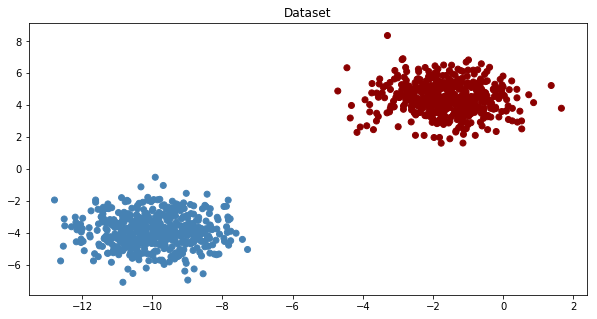

In [15]:
# Create and display datset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

y = [yy if yy == 1 else -1 for yy in y] 

print_dataset(X, y)

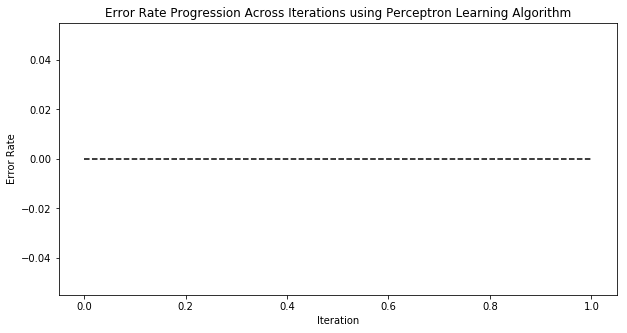

Min Error: 0.0
Max Error: 0.0
Final Error: 0.0


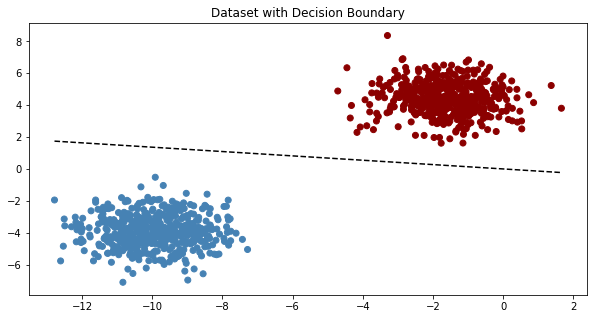

Perceptron Learning Algorithm Results
Number of Iterations:      	 2
Number of Training Samples:	 1000
Calculation Error:         	 0.0


In [16]:
# Run Perception Learning Algorithm
run_pla(X,y);

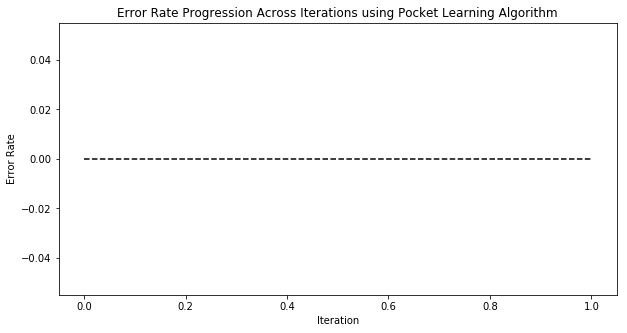

Min Error: 0.0
Max Error: 0.0
Final Error: 0.0


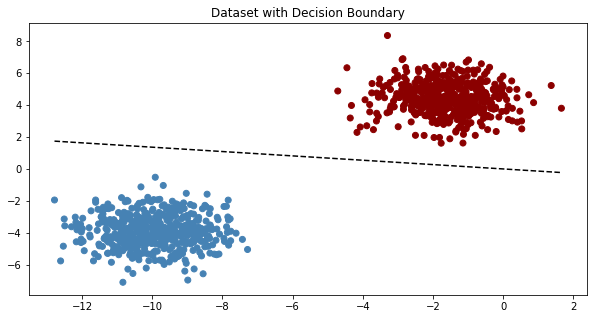

Pocket Algorithm Results
Number of Iterations:      	 2
Number of Training Samples:	 1000
Calculation Error:         	 0.0


In [17]:
# Run Pocket Learning Algorithm
run_pla(X,y, pocket=True);

### Blob Dataset Key Takeaways
* Data is linearly separable
* Perceptron Learning Algorithm delivers a 0% Error Rate
* Pocket Learning Algorithm delivers a 0% Error Rate
* Equivalence between the two algorithms was expected

## Moons Dataset Initial Experimentation

Moons dataset is not linearly separable. Therefore, Perceptron Learning algorithm will not deliver a 0% error rate.

Pocket Learning algorithm *should* help achieve a better error rate

Running both algorithms to compare the performance

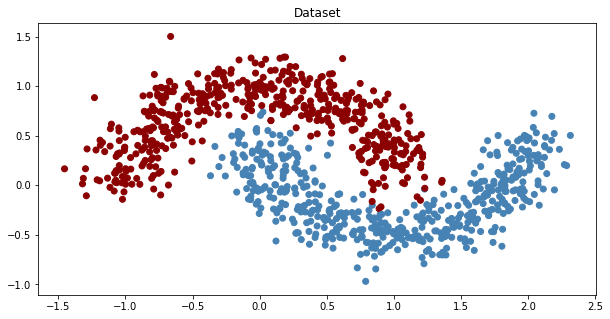

In [18]:
# Create Moons dataset and display
X, y = make_moons(n_samples=1000, noise=0.15, random_state=1)

y = [yy if yy == 1 else -1 for yy in y]

print_dataset(X, y)

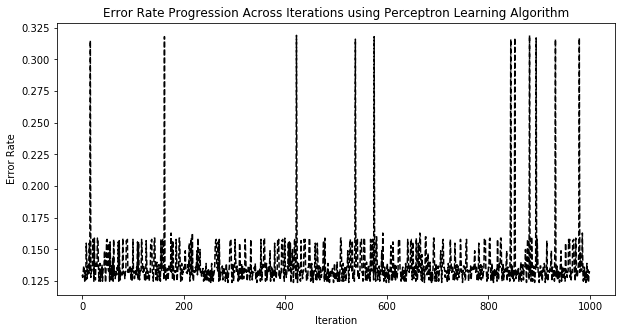

Min Error: 0.124
Max Error: 0.319
Final Error: 0.133


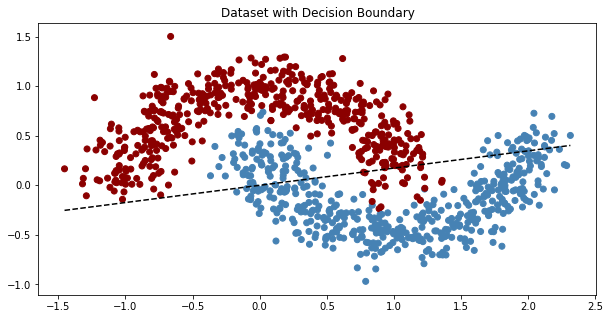

Perceptron Learning Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 1000
Calculation Error:         	 0.133


In [19]:
# Run Perception Learning Algorithm on Moons Datset
run_pla(X,y);

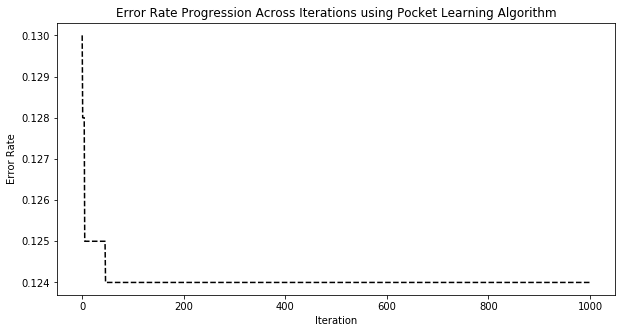

Min Error: 0.124
Max Error: 0.319
Final Error: 0.133


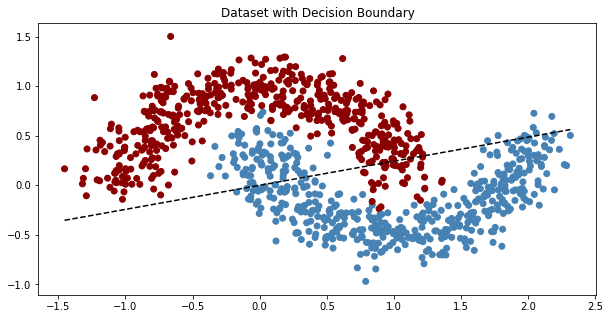

Pocket Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 1000
Calculation Error:         	 0.124


In [20]:
# Run Pocket Learning Algorithm on Moons Dataset
run_pla(X,y, pocket=True);

### Moons Dataset Key Takeaways
* Data is *NOT* linearly separable
* Perceptron Learning Algorithm delivers a 13.3% Error Rate
* Pocket Learning Algorithm delivers a 12.4% Error Rate
* Therefore Pocket Learning Algorithm helped improve performance by 0.9%

## Task 1
* Load bank_et1.csv into a Pandas dataframe. 
* Examine the first few data rows and the last few data rows. 
* Identify an attribute that can be the target/dependable variable for 2-class classification. 
* Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below).

In [21]:
df = pd.read_csv('./bank_et1.csv')

print("Numer of Samples  in Dataset:\t",df.shape[0])
print("Numer of Features in Dataset:\t",df.shape[1])

Numer of Samples  in Dataset:	 2000
Numer of Features in Dataset:	 20


In [22]:
# Examine the first few data rows
# Print first 5 rows of the dataframe
df.head(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [23]:
# Examine the last few data rows.
# Print last 5 rows of the dataframe
df.tail(5)

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


#### Identify an attribute that can be the target/dependable variable for 2-class classification.

I am choosing a simple approach that is going to ignore any features with missing values and look for features that only have two unique values

The code below will print the names of any features that satisfy the following criteria:
* No missing values
* Only 2 unique values

In [24]:
for column in df:
    if((df[column].nunique()==2)and(df[column].isnull().sum()==0)):
        print(column)
        (df[column]=='no').sum()
        

default
housing
loan
subscribed


The test returns 4 different features that satisfy the condition to have only two states and to have no missing values

Inspecting these features, they all have "yes" or "no" values.

Before selecting one of these features, I want to see what the distribution of "yes" to "no" looks like in the dataset.

Intuitively, it would seem that you would want the "yes"/"no" split to be reasonably distributed such that one is not much more prevalent that the other

In [25]:
print("default   ","\tYes:\t",(df.default=='yes').sum(),"\tNo:\t",(df.default=='no').sum())
print("housing   ","\tYes:\t",(df.housing=='yes').sum(),"\tNo:\t",(df.housing=='no').sum())
print("loan      ","\tYes:\t",(df.loan=='yes').sum(),"\tNo:\t",(df.loan=='no').sum())
print("subscribed","\tYes:\t",(df.subscribed=='yes').sum(),"\tNo:\t",(df.subscribed=='no').sum())

default    	Yes:	 15 	No:	 1985
housing    	Yes:	 963 	No:	 1037
loan       	Yes:	 250 	No:	 1750
subscribed 	Yes:	 1000 	No:	 1000


"housing" and "subscribed" both have balanced, or almost balanced, distributions

Therefore, I am choosing "subscribed" as the attribute for 2-class classification

### Task 1 Key Takeaways
* 4 Features had only 2 unique values, without missing values, and were candidates for 2-class classification
* "subscribed" had an even split of labels
* "subcribed" selected as the feature/attribute for 2-class classification


## Task 2

Follow the examples in the provided notebook “Lab 1 - Exploratory Data Analysis. ipynb ” (see section Material, Resources and Online Meetings below) to perform EDA of the bank data set.

* Calculate statistics for the numerical and categorical attributes.
* Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes. Draw short conclusions (in a markdown cell).
* Generate two plots with the combined distribution of attributes and draw conclusions from them (in a markdown cell).
* Generate additional plots to identify two numerical attributes that can potentially be used for predicting the value of the dependent variable you chose in Task 1.
   - You won't find two numerical attributes that will perfectly classify a dependent variable. Pick the best you can find.

In [26]:
# Calculate statistics for the numerical attributes.

# Print statistical summary for all numerical attributes
df.describe()

,Unnamed: 0,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,577.494589,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,0.000000,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,499.750000,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,999.500000,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,1499.250000,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,1999.000000,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


Frequency Table for housing:
yes     963
no     1037
Name: housing, dtype: int64
         subscribed
housing            
no         0.768563
yes        0.210800


Text(0,0.5,'Number of Applicants')

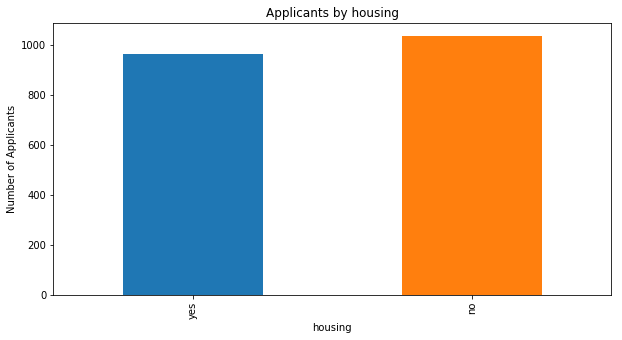

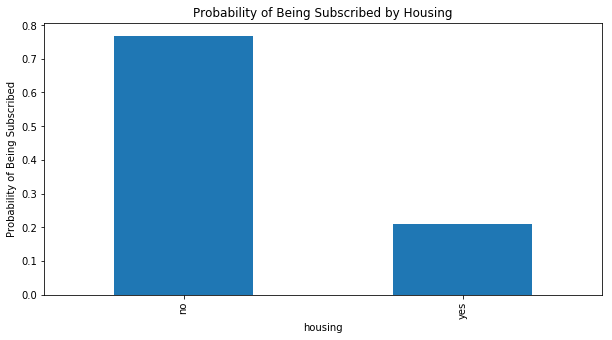

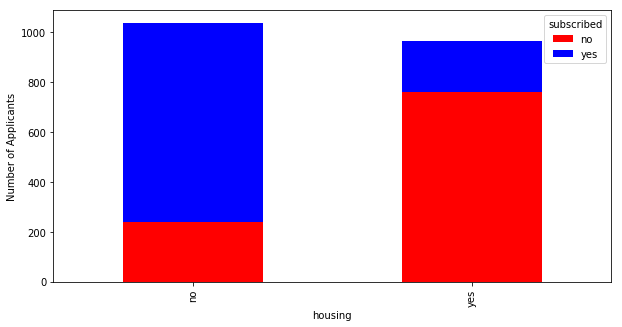

In [27]:
# Calculate statistics for the categorical attributes.

frequency_table = df['housing'].value_counts(ascending=True)
print('Frequency Table for housing:') 
print(frequency_table)

# Plot the frequency table for housing
frequency_table.plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('Number of Applicants')
plt.title('Applicants by housing')


pivot_table = df.pivot_table(values='subscribed',
                       index=['housing'],
                       aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

# Print pivot table
print(pivot_table)

# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('Probability of Being Subscribed')
plt.title('Probability of Being Subscribed by Housing')
plt.legend().set_visible(False) # we don't need the default legend


stacked_chart = pd.crosstab(df['housing'], df['subscribed'])
stacked_chart.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')

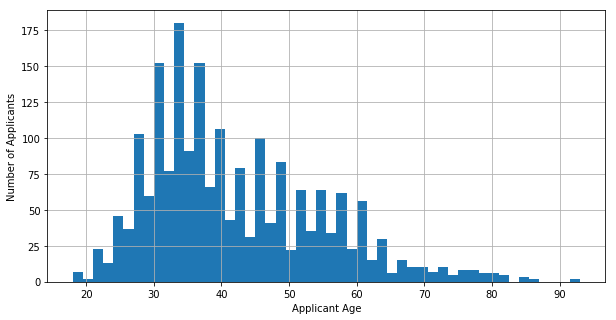

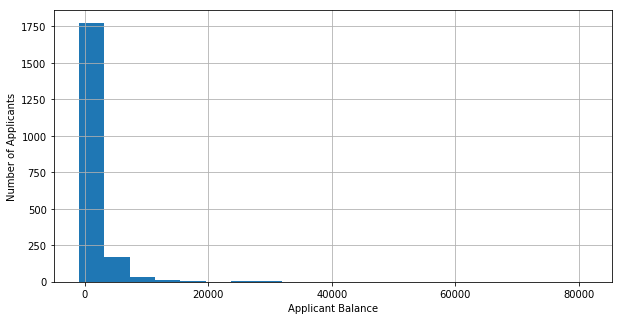

Text(0.5,0.98,'')

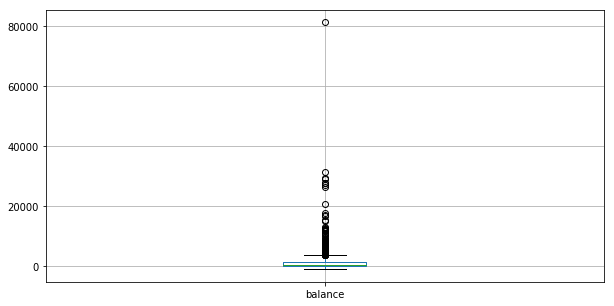

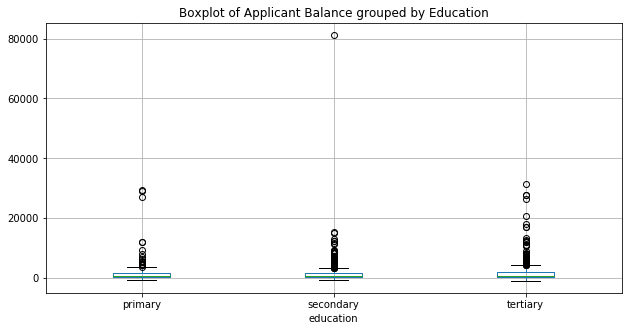

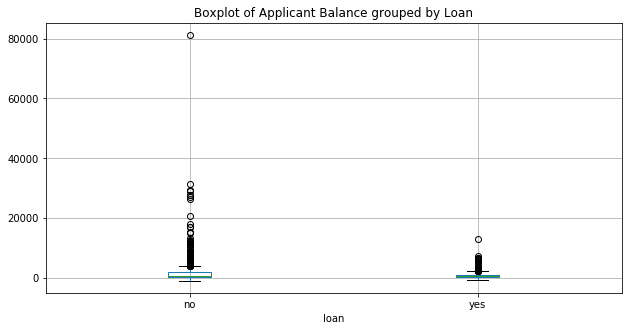

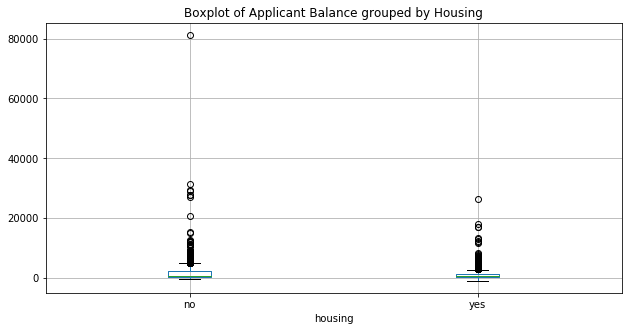

In [28]:
df['age'].hist(bins=50)
plt.xlabel('Applicant Age')
plt.ylabel('Number of Applicants')
plt.show()

df['balance'].hist(bins=20)
plt.xlabel('Applicant Balance')
plt.ylabel('Number of Applicants')
plt.show()

df.boxplot(column='balance')

# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='balance', by='education')
plt.title('Boxplot of Applicant Balance grouped by Education')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title


# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='balance', by='loan')
plt.title('Boxplot of Applicant Balance grouped by Loan')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title

# Boxplots of ApplicantIncome, grouped by the categorical attribute Education
df.boxplot(column='balance', by='housing')
plt.title('Boxplot of Applicant Balance grouped by Housing')
plt.suptitle("") # get rid of the automatic 'Boxplot grouped by group_by_column_name' title

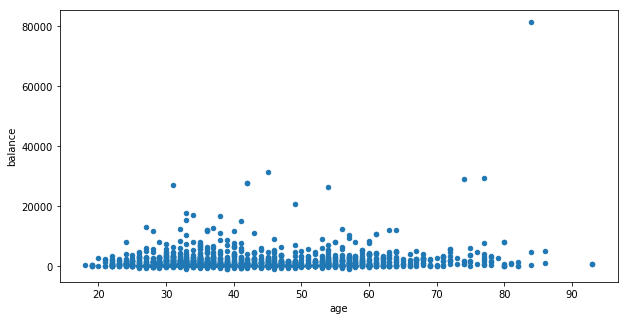

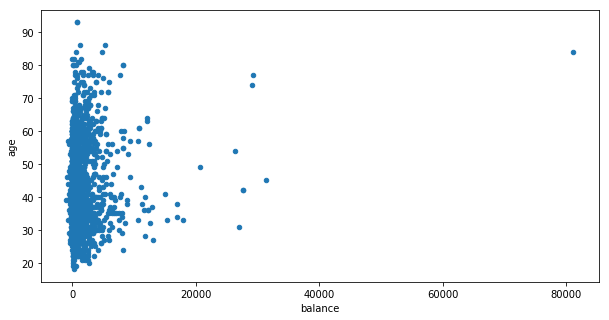

In [29]:
df.plot.scatter(x='age', y='balance')
df.plot.scatter(x='balance', y='age')

#### Task 2 Combined Distribution Attribute Conclusions
* TBD

## Search for Two Numerical Attributes for Predicting Value of "subscribed"
* For this search I am only using numerical data
  - Therefore drop column[0] which is only an index
  - Also drop all categorical attributes

In [30]:
# Drop the non-transformed columns
#df = df.drop(columns = [0])

# Drop column 0
df = df.drop(df.columns[0], axis=1)

# Drop Categorical Columns
df = df.drop(columns = ['poutcome', 'month', 'contact', 'loan', 'housing', 'default', 'education', 'marital', 'job',])

df.head(5)

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous,subscribed
0,32,392,1.300134,0.473895,1,957,2,131,2,no
1,39,688,-0.193701,0.237021,1,233,2,133,1,no
2,59,1035,1.334266,0.121981,1,126,2,239,1,no
3,47,398,0.362286,1.251328,1,274,1,238,2,no
4,54,1004,0.072075,-0.533738,1,479,1,307,1,no


#### Pairplots of Numerical Data

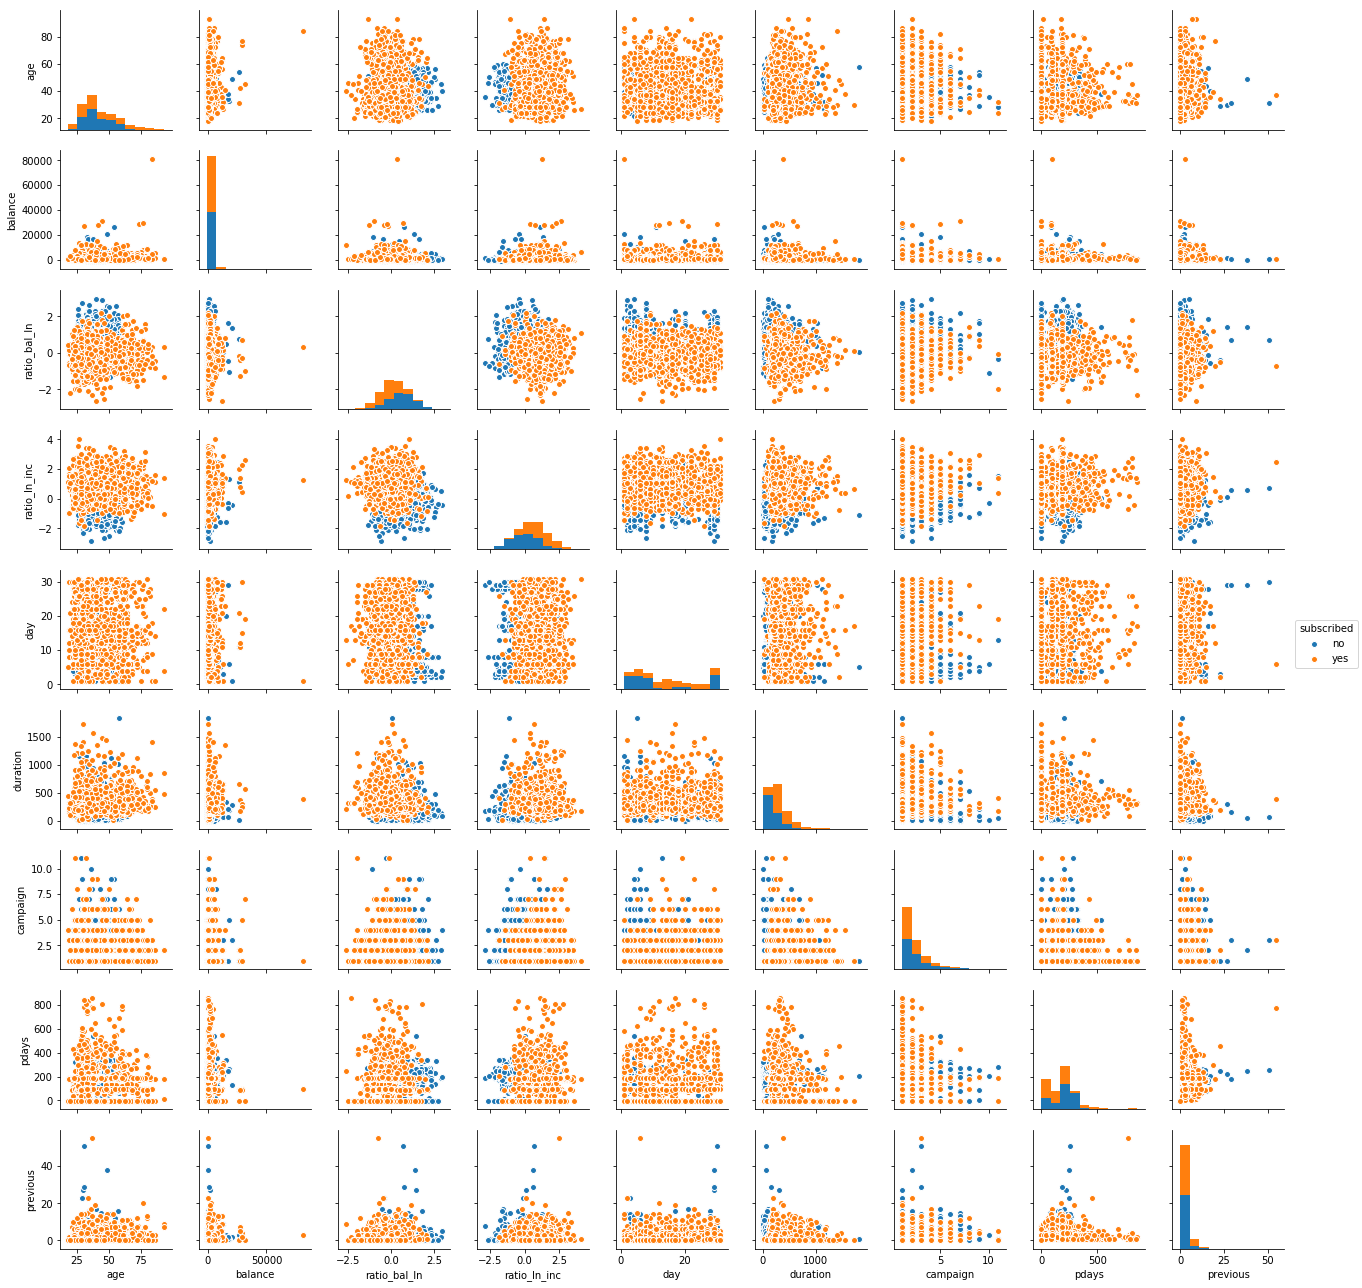

In [31]:
sns.pairplot(df, hue = 'subscribed', size=2)

#### Pairplot Initial Analysis

* In the plots above, I am looking for two variables that appear to be clustered similar to the "make_blobs" dataset and that would be suitable for using with the perceptron learning algorithm
* The following attributes look promising - "age", "ratio_bal_ln", "ratio_ln_inc"
* As there are a large number of plots, I am going to re-plot the pair plots just using the attributes of interest as this will allow easier visual inspection

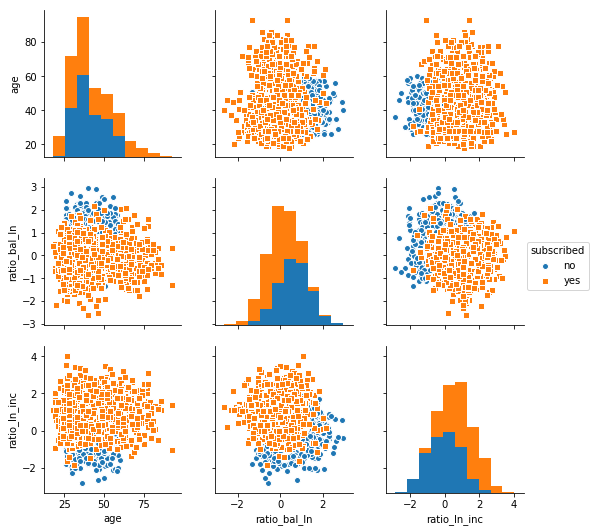

In [32]:
sns.pairplot(df, hue = 'subscribed', vars=["age", "ratio_bal_ln", "ratio_ln_inc"], markers=["o", "s"])

#### Pairplot Additional Analysis

* "ratio_bal_ln" and  "ratio_ln_inc" look like the best candidates for the perceptron learning algorithm

### Task 2 Key Takeaways
* "ratio_bal_ln" and  "ratio_ln_inc" are selected attributes


## Task 3

Consider the two numerical attributes picked in Task 2 and describe (in a markdown cell) how a perceptron can be used to perform 2-class classification. Use the following terms in your description:

* Input space
* Output space
* Unknown target function
* Data set
* Hypothesis set
* Final Hypothesis
* In-sample error
* Out-of-sample error

### Task 3 Key Takeaways
* TODO

## Task 4

Run the provided perceptron learning algorithm (PLA) on the dataset provided in the notebook. Take note of the number of iterations that were required to come to the final hypothesis and the final error. Once you are satisfied you understand these results, run the PLA algorithm on the dataset you have explored in the previous tasks (using the selected dependent variable and the two most promising numerical attributes/features). If results are unsatisfactory (if you don't get results at all, why would this be?), investigate how the PLA algorithm can be changed to improve the performance. Change the provided algorithm accordingly and plot estimates for P[Ein-Eout|>e]. Exercise 1.10 (see Python code below in the Resources section) gives an example of how you can create such plots. In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).

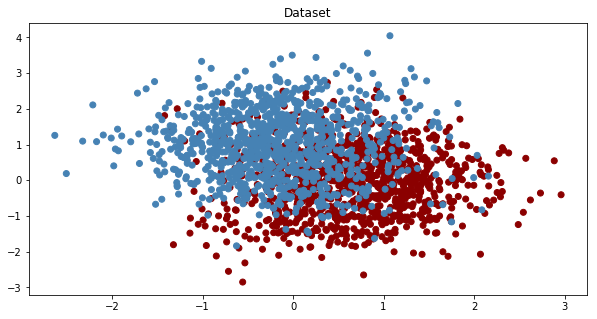

In [33]:
# Create the dataset from the dataframe
X = df[['ratio_bal_ln', 'ratio_ln_inc']].values
y_labels = df[['subscribed']].values
y = [1 if yy == 'yes' else -1 for yy in y_labels] 

# Print the Resulting Dataset
print_dataset(X, y)


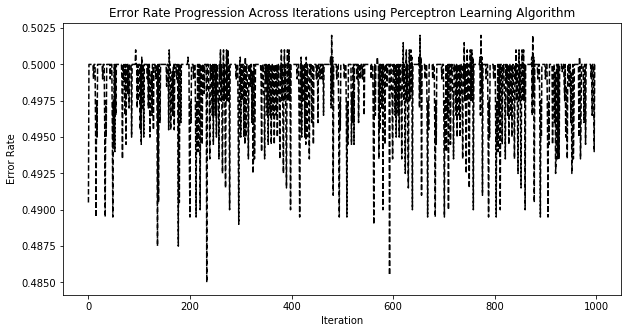

Min Error: 0.485
Max Error: 0.502
Final Error: 0.5


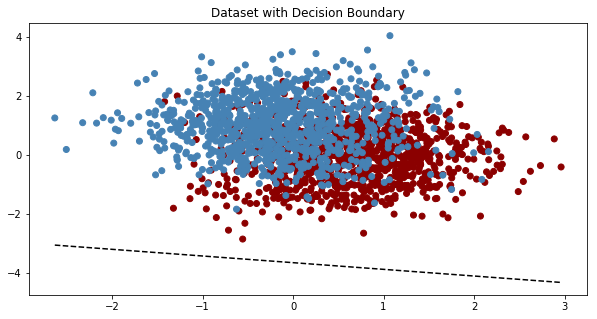

Perceptron Learning Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 2000
Calculation Error:         	 0.5


In [34]:
# Run Perceptron Learning Algorithm on Dataset
# As data is not truly separable, expect poor performance
run_pla(X,y);

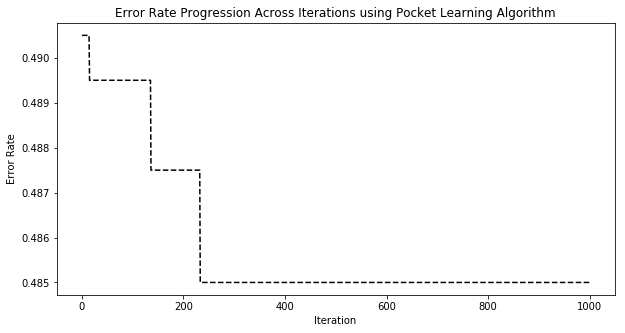

Min Error: 0.485
Max Error: 0.502
Final Error: 0.5


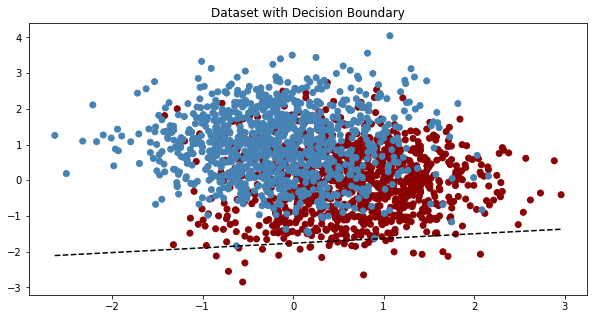

Pocket Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 2000
Calculation Error:         	 0.485


In [35]:
# Run Pocket Learning Algorithm on Dataset
# Expect Performance to Improve relative to plain Perceptron Learning Algorithm
run_pla(X,y, pocket=True);

#### Initial Results Analysis

* Perceptron Learning Algorithm
  - The error rate is 50%
  - From the graph, it can be seen that the decision boundary is below all the datapoints. As the datapoints are split 50/50 in terms of "subscribed", this means that having the decision boundary at this point is guaranteed to get at least 50% of the predictions correct for a 2-class classification
  - No *learning* has taken place
  
* Pocket Learning Algorithm
  - The error rate is 48.5%
  - This is a slight improvement on the 50% and suggests some *learning* has taken place although in truth it is not significant and is not far off noise
  
* Results Analysis
  - The performance is *terrible*
  - Looking at the labels of the dataset, it can be seen that the first 1000 labels are "-1" and the last 1000 labels are "1"
  - This means that for the first 1000 iterations, the algorithm is converging on a line that can classify samples labelled as "-1" and for the last 1000 iterations it is converging on a line that can classift samples labelled as "1"
  - This would explain the positioning of the decision boundary!
  
  
* *Next Steps*
  - Shuffle/Interleave the dataset so that the labels are not a continuous stream of "-1"/"+1"...

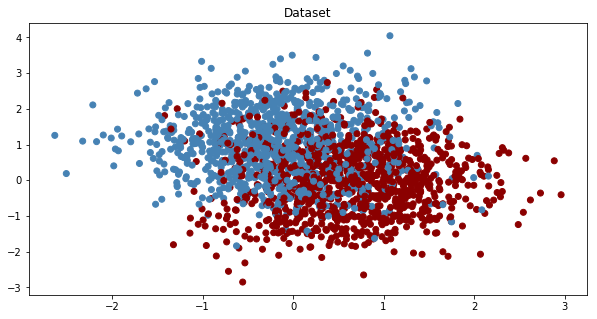

In [36]:
# Shuffle the dataset
X_shuffle = np.empty(X.shape)
y_shuffle = np.empty(len(y))


pivot = len(y)//2

# The following code interleaves the labels (technically not a shuffle)
for i in range(pivot):
    X_shuffle[(2*i)]   = X[i]
    X_shuffle[(2*i)+1] = X[pivot+i]
    y_shuffle[(2*i)]   = y[i]
    y_shuffle[(2*i)+1] = y[pivot+i]

# Print the resulting dataset to see that it still looks like the original dataset
print_dataset(X_shuffle, y_shuffle)

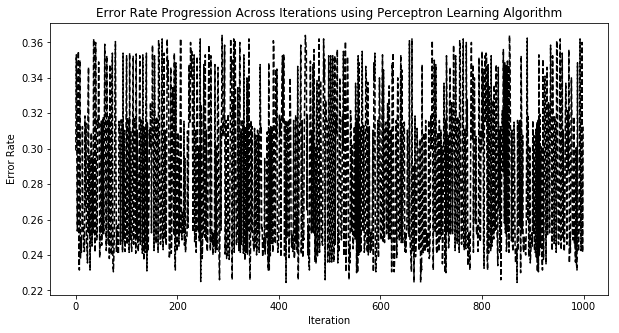

Min Error: 0.2245
Max Error: 0.364
Final Error: 0.3125


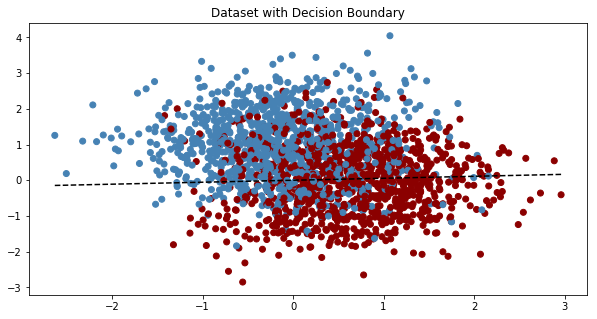

Perceptron Learning Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 2000
Calculation Error:         	 0.3125


In [37]:
# Run the Perceptron Learning Algorithm on the Shuffled Dataset and store off the final weights
final_weights, _ = run_pla(X_shuffle,y_shuffle);

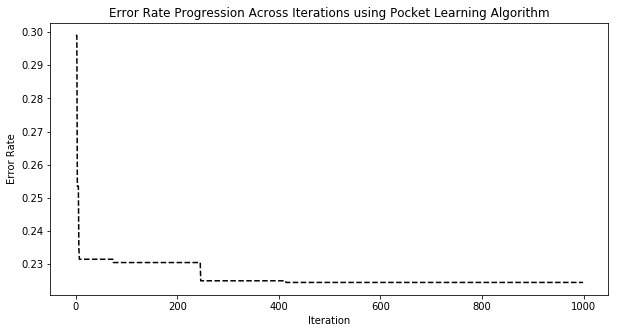

Min Error: 0.2245
Max Error: 0.364
Final Error: 0.3125


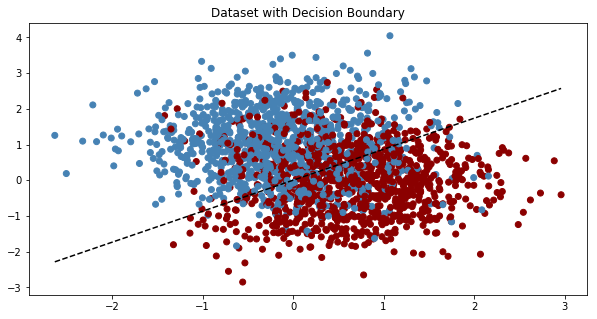

Pocket Algorithm Results
Number of Iterations:      	 1000
Number of Training Samples:	 2000
Calculation Error:         	 0.2245


In [38]:
# Run the Pocket Learning Algorithm on the Shuffled Dataset and store off the final weights
final_pocket_weights, _ = run_pla(X_shuffle,y_shuffle, pocket=True);

In [39]:
# Cross check weights from shuffled data set with original dataset and see if the same error rate is obtained

# Get result of using original dataset with final weights obtained from perceptron learning algorithm on shuffled dataset
print("Error Rate using Original Dataset final weights obtained from perceptron learning algorithm on shuffled dataset: ",calc_error(X, y, final_weights))

# Get result of using original dataset with final weights obtained from pocket learning algorithm on shuffled dataset
print("Error Rate using Original Dataset final weights obtained from pocketlearning algorithm on shuffled dataset: ",calc_error(X, y, final_pocket_weights))


Error Rate using Original Dataset final weights obtained from perceptron learning algorithm on shuffled dataset:  0.3125
Error Rate using Original Dataset final weights obtained from pocketlearning algorithm on shuffled dataset:  0.2245


#### Subsequent Results Analysis

* Perceptron Learning Algorithm
  - The error rate is now 31.25% for the same number of iterations as used on the original, non-shuffled, dataset
  - This is an improvement of 18.75%
  - From the graph, it can be seen that the decision boundary is below all the datapoints. As the datapoints are split 50/50 in terms of "subscribed", this means that having the decision boundary at this point is guaranteed to get at least 50% of the predictions correct for a 2-class classification
  - No *learning* has taken place
  
* Pocket Learning Algorithm
  - The error rate is 22.45% for the same number of iterations as used on the original, non-shuffled, dataset.
  - This is an improvement of 8.8% on just using the plain perceptron algorithm and 27.55% on the using the same algorithm on the original non-shuffled dataset
  
* Results Analysis
  - The performance is much improved once the dataset is shuffled to interleave the labels
  - Cross checking by using the weights obtained using the shuffled dataset and applying them to the original dataset gave the same error rate. This is to be expected if the dataset has not been corrupted by the shuffling process
  
  
### Task 4 Key Takeaways
* Using "ratio_bal_ln" and  "ratio_ln_inc", an accuracy of 77.55%  with 1000 iterations was achieved when predicting the value of the "subscribed" feature
* This is better than the baseline of 50% accuracy that could be achieved by simply predicting all values to either be "yes" or "no"
* This suggests learning has taken place

* TODO 
  o plot estimates for P[Ein-Eout|>e]
  o In the same plot add the Hoeffding Bound  and conclude whether or not the found results obey the Hoeffding Equation (in a markdown cell). 
  o Draw conclusions on whether or not you have found proof that learning is possible (in a markdown cell).
  